# Neural Net to Predict Age

# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.optimizers import Adam

# Data

In [2]:
data = pd.read_csv("./Volumetric_features.csv")

data_features = pd.DataFrame(data, columns = data.columns[:-1])
data_features = data_features.drop(['S.No','Age'], axis=1)

data_features.head()
data_features.describe()

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03
mean,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,1797.243469,...,2.117151,2.655624,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06
std,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,583.220321,...,0.174228,0.207942,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05
min,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,371.900000,...,1.499000,1.563000,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05
25%,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,1408.050000,...,2.002250,2.521000,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06
50%,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,1683.850000,...,2.130000,2.665000,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06
75%,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,2044.525000,...,2.245000,2.808000,2.562750,2.851000,3.790000,2.476000,2.975000,2.483143,1.168888e+06,1.625445e+06
max,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,5312.400000,...,2.671000,3.240000,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06


# Preprocessing

## Pulling top features

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(data_features)
n = 20
pca = PCA(n_components=n)
pca_dataF = pca.fit_transform(x)

labels = data_features.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_dataF, columns=columns)
pca_df.head()
pca_df.describe()

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_pericalcarine_thickness,SurfaceHoles,CC_Posterior,rh_caudalanteriorcingulate_thickness,CC_Posterior,Right-Caudate,lh_parahippocampal_thickness,MaskVol-to-eTIV,Brain-Stem,Left-vessel,Right-vessel,non-WM-hypointensities,rh_isthmuscingulate_thickness,5th-Ventricle,non-WM-hypointensities,5th-Ventricle,5th-Ventricle
count,4.226000e+03,4.226000e+03,4.226000e+03,4.226000e+03,4.226000e+03,4.226000e+03,4.226000e+03,4226.000000,4.226000e+03,4.226000e+03,4.226000e+03,4226.000000,4.226000e+03,4.226000e+03,4.226000e+03,4.226000e+03,4.226000e+03,4.226000e+03,4226.000000,4.226000e+03
mean,-2.152141e-16,2.152141e-16,2.690176e-17,-1.076070e-16,-2.690176e-17,8.070528e-17,-1.176952e-16,0.000000,-2.690176e-17,3.026448e-17,2.690176e-17,0.000000,-6.725440e-18,5.380352e-17,1.681360e-18,2.690176e-17,-4.035264e-17,3.026448e-17,0.000000,3.362720e-17
std,7.049398e+00,4.329355e+00,2.571239e+00,2.053967e+00,1.898624e+00,1.576450e+00,1.500172e+00,1.393177,1.335859e+00,1.294716e+00,1.226713e+00,1.204393,1.168763e+00,1.127064e+00,1.059687e+00,1.049359e+00,1.027526e+00,1.008710e+00,0.987759,9.821945e-01
min,-2.098823e+01,-1.476308e+01,-9.547628e+00,-5.983544e+00,-5.240570e+00,-8.398125e+00,-6.709818e+00,-5.448820,-7.128866e+00,-1.034856e+01,-7.738633e+00,-5.437126,-4.115130e+00,-3.719026e+00,-5.833115e+00,-4.207460e+00,-6.758401e+00,-1.319940e+01,-3.329051,-4.067476e+00
25%,-5.383383e+00,-2.976356e+00,-1.736066e+00,-1.334103e+00,-1.262336e+00,-1.004774e+00,-9.848046e-01,-0.910224,-8.378307e-01,-7.145458e-01,-7.272747e-01,-0.811984,-7.618693e-01,-6.872614e-01,-5.041229e-01,-6.233392e-01,-6.077795e-01,-4.801390e-01,-0.599168,-5.715935e-01
50%,-3.654960e-01,-2.534229e-01,-1.344588e-01,-1.937967e-01,-2.731717e-01,1.884800e-02,-4.068243e-02,-0.052731,-8.791107e-02,3.897293e-02,-1.022861e-01,-0.034641,-1.897638e-02,-9.353348e-02,2.845077e-02,3.331861e-03,-6.349221e-02,1.949618e-02,-0.034185,-3.460206e-02
75%,5.158247e+00,2.876860e+00,1.637295e+00,1.148140e+00,9.020880e-01,1.027398e+00,9.450970e-01,0.841465,7.518687e-01,7.696750e-01,6.403570e-01,0.796091,7.001528e-01,5.724801e-01,5.691523e-01,6.699195e-01,5.471908e-01,5.255871e-01,0.538043,5.250494e-01
max,3.848363e+01,2.463683e+01,1.350363e+01,2.780786e+01,1.886879e+01,8.636191e+00,9.978258e+00,7.640699,1.726194e+01,1.268716e+01,1.632796e+01,9.334397,6.615754e+00,1.070408e+01,2.721923e+01,9.063116e+00,9.846162e+00,1.784326e+01,15.112700,8.730936e+00


## Heatmap

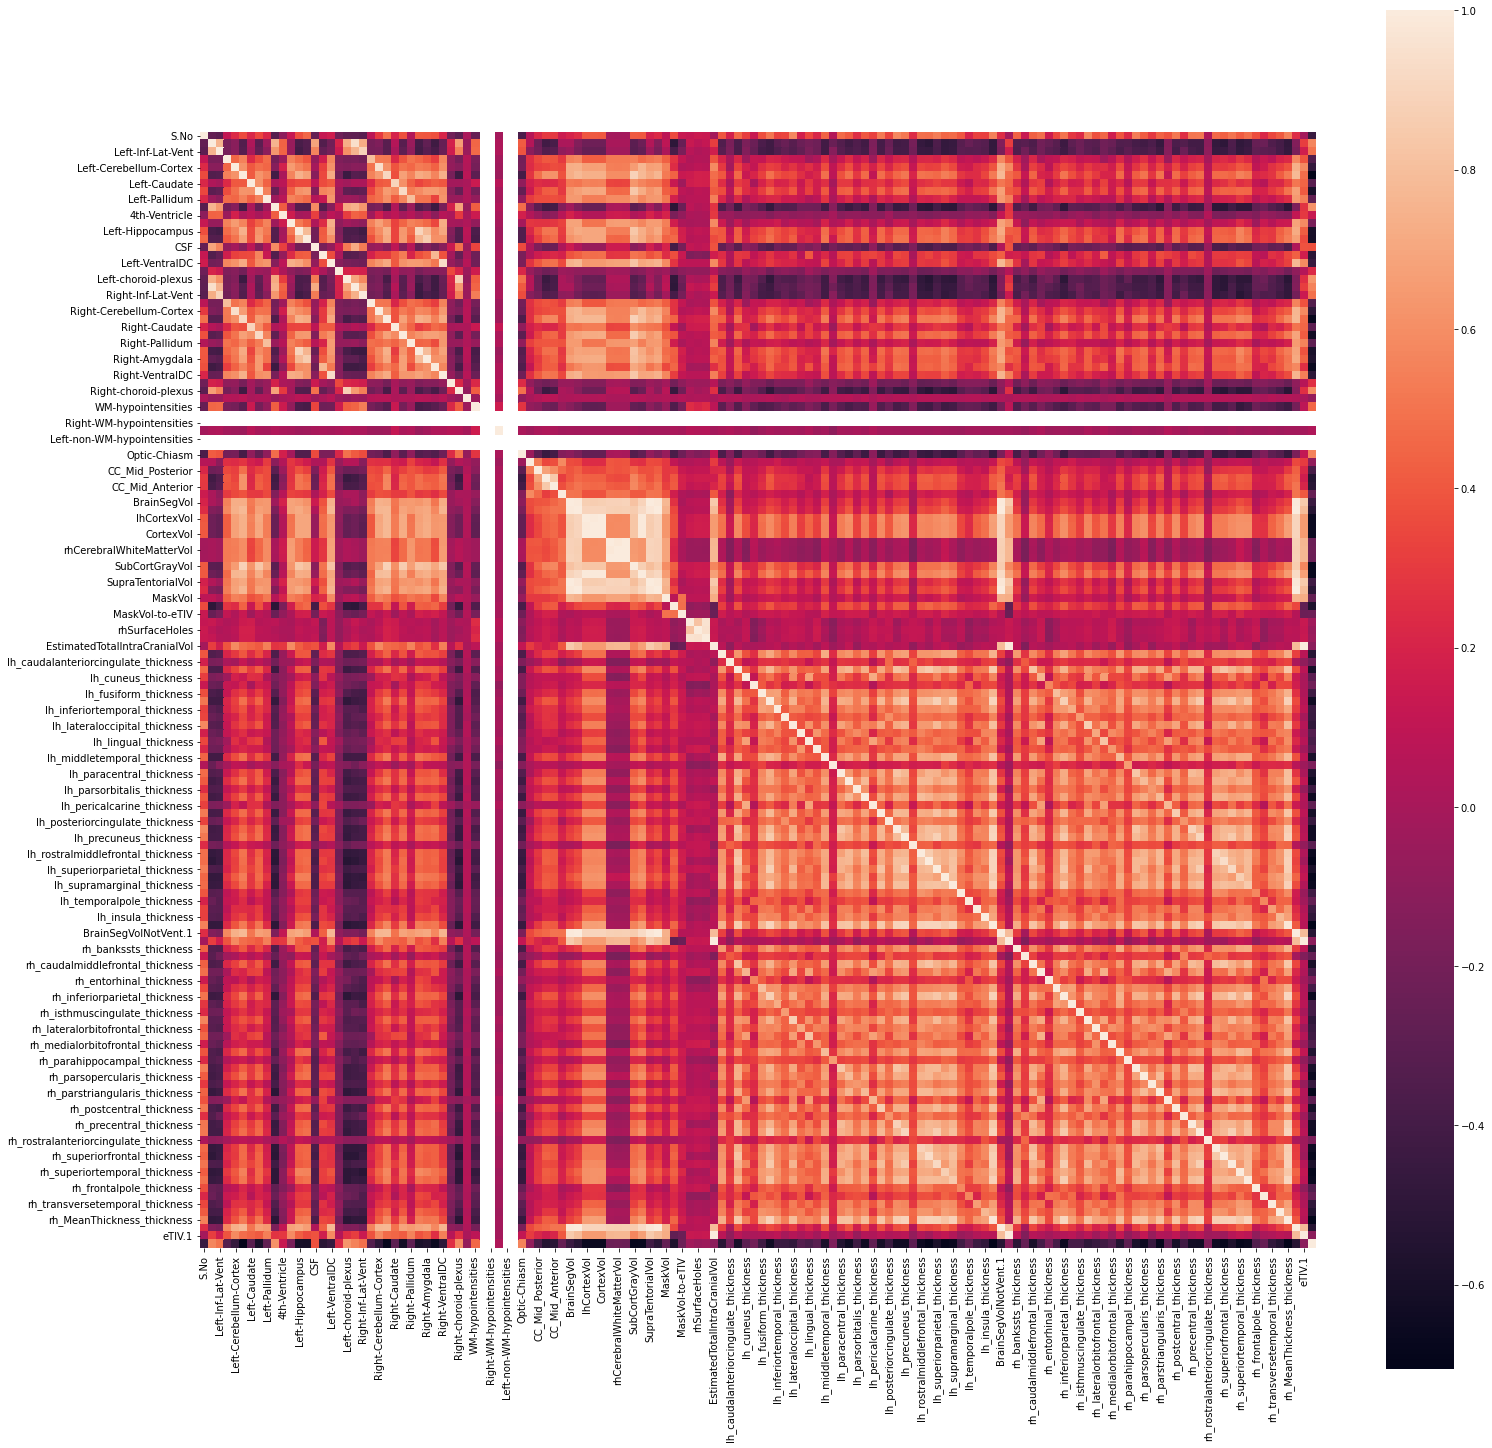

In [4]:
C_mat = data.iloc[:,:-1].corr()
fig = plt.figure(figsize = (25,25))

sb.heatmap(C_mat, square=True)
plt.show()

# Create Model

In [6]:
model = keras.models.Sequential()

model.add(keras.Input(shape=(20,)))
model.add(layers.Dense(138, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(278, activation='relu'))
model.add(layers.Dense(138, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 138)               2898      
_________________________________________________________________
dense_8 (Dense)              (None, 278)               38642     
_________________________________________________________________
dense_9 (Dense)              (None, 278)               77562     
_________________________________________________________________
dense_10 (Dense)             (None, 278)               77562     
_________________________________________________________________
dense_11 (Dense)             (None, 278)               77562     
_________________________________________________________________
dense_12 (Dense)             (None, 138)               38502     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

# Training

In [7]:
# Split out train data, 80%, and the rest, 20%
X_train, X_rest, Y_train, Y_rest = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)
# Spit out validate data, 15% (of total, 75% of X_rest), and test, 5% (of total, 25% of rest)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_rest, Y_rest, test_size=0.25, random_state=37)

training = model.fit(X_train, Y_train, batch_size=256, verbose=1, epochs=2000, validation_data=(X_validate, Y_validate))

score = model.evaluate(X_validate, Y_validate, verbose=0, batch_size=32)

print(score)
print("Validate mean_absolute_error:", score[0])
print("Validate accuracy:", score[1])

Epoch 1/2000
14/14 [==============================] - 1s 42ms/step - loss: 43.1508 - mean_absolute_error: 43.1508 - val_loss: 23.5660 - val_mean_absolute_error: 23.5660
Epoch 2/2000
14/14 [==============================] - 0s 20ms/step - loss: 20.5351 - mean_absolute_error: 20.5351 - val_loss: 16.5572 - val_mean_absolute_error: 16.5572
Epoch 3/2000
14/14 [==============================] - 0s 18ms/step - loss: 14.8876 - mean_absolute_error: 14.8876 - val_loss: 13.5979 - val_mean_absolute_error: 13.5979
Epoch 4/2000
14/14 [==============================] - 0s 17ms/step - loss: 11.9833 - mean_absolute_error: 11.9833 - val_loss: 11.4483 - val_mean_absolute_error: 11.4483
Epoch 5/2000
14/14 [==============================] - 0s 22ms/step - loss: 10.4415 - mean_absolute_error: 10.4415 - val_loss: 10.5397 - val_mean_absolute_error: 10.5397
Epoch 6/2000
14/14 [==============================] - 0s 27ms/step - loss: 9.7026 - mean_absolute_error: 9.7026 - val_loss: 9.9552 - val_mean_absolute_erro

14/14 [==============================] - 0s 14ms/step - loss: 1.9294 - mean_absolute_error: 1.9294 - val_loss: 6.9965 - val_mean_absolute_error: 6.9965
Epoch 100/2000
14/14 [==============================] - 0s 11ms/step - loss: 2.4453 - mean_absolute_error: 2.4453 - val_loss: 6.1410 - val_mean_absolute_error: 6.1410
Epoch 101/2000
14/14 [==============================] - 0s 11ms/step - loss: 2.1391 - mean_absolute_error: 2.1391 - val_loss: 6.1455 - val_mean_absolute_error: 6.1455
Epoch 102/2000
14/14 [==============================] - 0s 14ms/step - loss: 1.7185 - mean_absolute_error: 1.7185 - val_loss: 6.2258 - val_mean_absolute_error: 6.2258
Epoch 103/2000
14/14 [==============================] - 0s 12ms/step - loss: 1.5997 - mean_absolute_error: 1.5997 - val_loss: 6.0711 - val_mean_absolute_error: 6.0711
Epoch 104/2000
14/14 [==============================] - 0s 12ms/step - loss: 1.4858 - mean_absolute_error: 1.4858 - val_loss: 6.2391 - val_mean_absolute_error: 6.2391
Epoch 105/200

14/14 [==============================] - 0s 15ms/step - loss: 1.0466 - mean_absolute_error: 1.0466 - val_loss: 6.0263 - val_mean_absolute_error: 6.0263
Epoch 198/2000
14/14 [==============================] - 0s 31ms/step - loss: 0.9602 - mean_absolute_error: 0.9602 - val_loss: 6.1299 - val_mean_absolute_error: 6.1299
Epoch 199/2000
14/14 [==============================] - 0s 29ms/step - loss: 0.9718 - mean_absolute_error: 0.9718 - val_loss: 6.0860 - val_mean_absolute_error: 6.0860
Epoch 200/2000
14/14 [==============================] - 1s 40ms/step - loss: 1.2235 - mean_absolute_error: 1.2235 - val_loss: 6.0321 - val_mean_absolute_error: 6.0321
Epoch 201/2000
14/14 [==============================] - 0s 34ms/step - loss: 1.4286 - mean_absolute_error: 1.4286 - val_loss: 5.9954 - val_mean_absolute_error: 5.9954
Epoch 202/2000
14/14 [==============================] - 0s 28ms/step - loss: 1.6475 - mean_absolute_error: 1.6475 - val_loss: 6.2891 - val_mean_absolute_error: 6.2891
Epoch 203/200

14/14 [==============================] - 0s 16ms/step - loss: 0.9628 - mean_absolute_error: 0.9628 - val_loss: 5.9775 - val_mean_absolute_error: 5.9775
Epoch 296/2000
14/14 [==============================] - 0s 15ms/step - loss: 1.3943 - mean_absolute_error: 1.3943 - val_loss: 6.2048 - val_mean_absolute_error: 6.2048
Epoch 297/2000
14/14 [==============================] - 0s 14ms/step - loss: 1.1384 - mean_absolute_error: 1.1384 - val_loss: 5.9253 - val_mean_absolute_error: 5.9253
Epoch 298/2000
14/14 [==============================] - 0s 14ms/step - loss: 0.8933 - mean_absolute_error: 0.8933 - val_loss: 5.8752 - val_mean_absolute_error: 5.8752
Epoch 299/2000
14/14 [==============================] - 0s 12ms/step - loss: 0.9927 - mean_absolute_error: 0.9927 - val_loss: 6.0239 - val_mean_absolute_error: 6.0239
Epoch 300/2000
14/14 [==============================] - 0s 14ms/step - loss: 0.9590 - mean_absolute_error: 0.9590 - val_loss: 5.9123 - val_mean_absolute_error: 5.9123
Epoch 301/200

14/14 [==============================] - 0s 21ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - val_loss: 5.7214 - val_mean_absolute_error: 5.7214
Epoch 394/2000
14/14 [==============================] - 0s 15ms/step - loss: 1.2194 - mean_absolute_error: 1.2194 - val_loss: 5.7995 - val_mean_absolute_error: 5.7995
Epoch 395/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.9406 - mean_absolute_error: 0.9406 - val_loss: 5.7817 - val_mean_absolute_error: 5.7817
Epoch 396/2000
14/14 [==============================] - 0s 28ms/step - loss: 0.8825 - mean_absolute_error: 0.8825 - val_loss: 5.8786 - val_mean_absolute_error: 5.8786
Epoch 397/2000
14/14 [==============================] - 0s 15ms/step - loss: 0.9782 - mean_absolute_error: 0.9782 - val_loss: 5.9359 - val_mean_absolute_error: 5.9359
Epoch 398/2000
14/14 [==============================] - 0s 16ms/step - loss: 0.8156 - mean_absolute_error: 0.8156 - val_loss: 5.9416 - val_mean_absolute_error: 5.9416
Epoch 399/200

14/14 [==============================] - 0s 14ms/step - loss: 1.0195 - mean_absolute_error: 1.0195 - val_loss: 5.8281 - val_mean_absolute_error: 5.8281
Epoch 492/2000
14/14 [==============================] - 0s 14ms/step - loss: 1.1512 - mean_absolute_error: 1.1512 - val_loss: 5.7978 - val_mean_absolute_error: 5.7978
Epoch 493/2000
14/14 [==============================] - 0s 13ms/step - loss: 1.1688 - mean_absolute_error: 1.1688 - val_loss: 5.9694 - val_mean_absolute_error: 5.9694
Epoch 494/2000
14/14 [==============================] - 0s 15ms/step - loss: 1.2269 - mean_absolute_error: 1.2269 - val_loss: 5.7589 - val_mean_absolute_error: 5.7589
Epoch 495/2000
14/14 [==============================] - 0s 15ms/step - loss: 0.9869 - mean_absolute_error: 0.9869 - val_loss: 5.8088 - val_mean_absolute_error: 5.8088
Epoch 496/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.9514 - mean_absolute_error: 0.9514 - val_loss: 5.8649 - val_mean_absolute_error: 5.8649
Epoch 497/200

14/14 [==============================] - 0s 27ms/step - loss: 1.2009 - mean_absolute_error: 1.2009 - val_loss: 5.9105 - val_mean_absolute_error: 5.9105
Epoch 590/2000
14/14 [==============================] - 0s 22ms/step - loss: 1.3055 - mean_absolute_error: 1.3055 - val_loss: 5.9330 - val_mean_absolute_error: 5.9330
Epoch 591/2000
14/14 [==============================] - 0s 23ms/step - loss: 1.0567 - mean_absolute_error: 1.0567 - val_loss: 5.7431 - val_mean_absolute_error: 5.7431
Epoch 592/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.8781 - mean_absolute_error: 0.8781 - val_loss: 5.7656 - val_mean_absolute_error: 5.7656
Epoch 593/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.8730 - mean_absolute_error: 0.8730 - val_loss: 5.8684 - val_mean_absolute_error: 5.8684
Epoch 594/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.8259 - mean_absolute_error: 0.8259 - val_loss: 5.7067 - val_mean_absolute_error: 5.7067
Epoch 595/200

Epoch 687/2000
14/14 [==============================] - 0s 25ms/step - loss: 0.5635 - mean_absolute_error: 0.5635 - val_loss: 5.6975 - val_mean_absolute_error: 5.6975
Epoch 688/2000
14/14 [==============================] - 0s 14ms/step - loss: 0.7100 - mean_absolute_error: 0.7100 - val_loss: 5.7562 - val_mean_absolute_error: 5.7562
Epoch 689/2000
14/14 [==============================] - 0s 14ms/step - loss: 1.1024 - mean_absolute_error: 1.1024 - val_loss: 5.7401 - val_mean_absolute_error: 5.7401
Epoch 690/2000
14/14 [==============================] - 0s 15ms/step - loss: 1.1017 - mean_absolute_error: 1.1017 - val_loss: 5.6799 - val_mean_absolute_error: 5.6799
Epoch 691/2000
14/14 [==============================] - 0s 14ms/step - loss: 1.0487 - mean_absolute_error: 1.0487 - val_loss: 5.9158 - val_mean_absolute_error: 5.9158
Epoch 692/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.9903 - mean_absolute_error: 0.9903 - val_loss: 5.8042 - val_mean_absolute_error: 5.804

14/14 [==============================] - 1s 36ms/step - loss: 0.7216 - mean_absolute_error: 0.7216 - val_loss: 5.5636 - val_mean_absolute_error: 5.5636
Epoch 737/2000
14/14 [==============================] - 0s 32ms/step - loss: 0.7710 - mean_absolute_error: 0.7710 - val_loss: 5.5562 - val_mean_absolute_error: 5.5562
Epoch 738/2000
14/14 [==============================] - 0s 29ms/step - loss: 0.6252 - mean_absolute_error: 0.6252 - val_loss: 5.6182 - val_mean_absolute_error: 5.6182
Epoch 739/2000
14/14 [==============================] - 0s 24ms/step - loss: 0.6565 - mean_absolute_error: 0.6565 - val_loss: 5.5726 - val_mean_absolute_error: 5.5726
Epoch 740/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.7899 - mean_absolute_error: 0.7899 - val_loss: 5.6322 - val_mean_absolute_error: 5.6322
Epoch 741/2000
14/14 [==============================] - 0s 25ms/step - loss: 0.9861 - mean_absolute_error: 0.9861 - val_loss: 5.6748 - val_mean_absolute_error: 5.6748
Epoch 742/200

14/14 [==============================] - 0s 21ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - val_loss: 5.5948 - val_mean_absolute_error: 5.5948
Epoch 835/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.5619 - mean_absolute_error: 0.5619 - val_loss: 5.5853 - val_mean_absolute_error: 5.5853
Epoch 836/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.6395 - mean_absolute_error: 0.6395 - val_loss: 5.6109 - val_mean_absolute_error: 5.6109
Epoch 837/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.7216 - mean_absolute_error: 0.7216 - val_loss: 5.5658 - val_mean_absolute_error: 5.5658
Epoch 838/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.5651 - mean_absolute_error: 0.5651 - val_loss: 5.5897 - val_mean_absolute_error: 5.5897
Epoch 839/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - val_loss: 5.5939 - val_mean_absolute_error: 5.5939
Epoch 840/200

14/14 [==============================] - 0s 25ms/step - loss: 0.5258 - mean_absolute_error: 0.5258 - val_loss: 5.5093 - val_mean_absolute_error: 5.5093
Epoch 933/2000
14/14 [==============================] - 0s 24ms/step - loss: 0.6531 - mean_absolute_error: 0.6531 - val_loss: 5.5754 - val_mean_absolute_error: 5.5754
Epoch 934/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6485 - mean_absolute_error: 0.6485 - val_loss: 5.4834 - val_mean_absolute_error: 5.4834
Epoch 935/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.5696 - mean_absolute_error: 0.5696 - val_loss: 5.4826 - val_mean_absolute_error: 5.4826
Epoch 936/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6307 - mean_absolute_error: 0.6307 - val_loss: 5.5297 - val_mean_absolute_error: 5.5297
Epoch 937/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - val_loss: 5.5560 - val_mean_absolute_error: 5.5560
Epoch 938/200

Epoch 1030/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.8843 - mean_absolute_error: 0.8843 - val_loss: 5.4710 - val_mean_absolute_error: 5.4710
Epoch 1031/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.5613 - mean_absolute_error: 0.5613 - val_loss: 5.4425 - val_mean_absolute_error: 5.4425
Epoch 1032/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.5724 - mean_absolute_error: 0.5724 - val_loss: 5.5125 - val_mean_absolute_error: 5.5125
Epoch 1033/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.5340 - mean_absolute_error: 0.5340 - val_loss: 5.4847 - val_mean_absolute_error: 5.4847
Epoch 1034/2000
14/14 [==============================] - 0s 24ms/step - loss: 0.6762 - mean_absolute_error: 0.6762 - val_loss: 5.5846 - val_mean_absolute_error: 5.5846
Epoch 1035/2000
14/14 [==============================] - 0s 25ms/step - loss: 0.6569 - mean_absolute_error: 0.6569 - val_loss: 5.5143 - val_mean_absolute_error:

Epoch 1079/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.5567 - mean_absolute_error: 0.5567 - val_loss: 5.4611 - val_mean_absolute_error: 5.4611
Epoch 1080/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.8730 - mean_absolute_error: 0.8730 - val_loss: 5.4640 - val_mean_absolute_error: 5.4640
Epoch 1081/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6387 - mean_absolute_error: 0.6387 - val_loss: 5.4433 - val_mean_absolute_error: 5.4433
Epoch 1082/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.7797 - mean_absolute_error: 0.7797 - val_loss: 5.4869 - val_mean_absolute_error: 5.4869
Epoch 1083/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.5879 - mean_absolute_error: 0.5879 - val_loss: 5.5210 - val_mean_absolute_error: 5.5210
Epoch 1084/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.5375 - mean_absolute_error: 0.5375 - val_loss: 5.4472 - val_mean_absolute_error:

Epoch 1128/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.5868 - mean_absolute_error: 0.5868 - val_loss: 5.4402 - val_mean_absolute_error: 5.4402
Epoch 1129/2000
14/14 [==============================] - 0s 24ms/step - loss: 0.5663 - mean_absolute_error: 0.5663 - val_loss: 5.4420 - val_mean_absolute_error: 5.4420
Epoch 1130/2000
14/14 [==============================] - 0s 25ms/step - loss: 0.5619 - mean_absolute_error: 0.5619 - val_loss: 5.4708 - val_mean_absolute_error: 5.4708
Epoch 1131/2000
14/14 [==============================] - 0s 26ms/step - loss: 0.5842 - mean_absolute_error: 0.5842 - val_loss: 5.3982 - val_mean_absolute_error: 5.3982
Epoch 1132/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.5637 - mean_absolute_error: 0.5637 - val_loss: 5.3846 - val_mean_absolute_error: 5.3846
Epoch 1133/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.5195 - mean_absolute_error: 0.5195 - val_loss: 5.4377 - val_mean_absolute_error:

Epoch 1177/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.5711 - mean_absolute_error: 0.5711 - val_loss: 5.3767 - val_mean_absolute_error: 5.3767
Epoch 1178/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - val_loss: 5.4332 - val_mean_absolute_error: 5.4332
Epoch 1179/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.5570 - mean_absolute_error: 0.5570 - val_loss: 5.3733 - val_mean_absolute_error: 5.3733
Epoch 1180/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.5123 - mean_absolute_error: 0.5123 - val_loss: 5.3666 - val_mean_absolute_error: 5.3666
Epoch 1181/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.4772 - mean_absolute_error: 0.4772 - val_loss: 5.3712 - val_mean_absolute_error: 5.3712
Epoch 1182/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.4475 - mean_absolute_error: 0.4475 - val_loss: 5.3678 - val_mean_absolute_error:

Epoch 1226/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - val_loss: 5.3698 - val_mean_absolute_error: 5.3698
Epoch 1227/2000
14/14 [==============================] - 0s 24ms/step - loss: 0.4664 - mean_absolute_error: 0.4664 - val_loss: 5.3292 - val_mean_absolute_error: 5.3292
Epoch 1228/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.5191 - mean_absolute_error: 0.5191 - val_loss: 5.3664 - val_mean_absolute_error: 5.3664
Epoch 1229/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.4470 - mean_absolute_error: 0.4470 - val_loss: 5.3475 - val_mean_absolute_error: 5.3475
Epoch 1230/2000
14/14 [==============================] - 0s 31ms/step - loss: 0.4794 - mean_absolute_error: 0.4794 - val_loss: 5.3642 - val_mean_absolute_error: 5.3642
Epoch 1231/2000
14/14 [==============================] - 0s 26ms/step - loss: 0.4974 - mean_absolute_error: 0.4974 - val_loss: 5.4044 - val_mean_absolute_error:

Epoch 1275/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6975 - mean_absolute_error: 0.6975 - val_loss: 5.4362 - val_mean_absolute_error: 5.4362
Epoch 1276/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.6632 - mean_absolute_error: 0.6632 - val_loss: 5.3546 - val_mean_absolute_error: 5.3546
Epoch 1277/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.6346 - mean_absolute_error: 0.6346 - val_loss: 5.4943 - val_mean_absolute_error: 5.4943
Epoch 1278/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.7970 - mean_absolute_error: 0.7970 - val_loss: 5.3835 - val_mean_absolute_error: 5.3835
Epoch 1279/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6243 - mean_absolute_error: 0.6243 - val_loss: 5.3742 - val_mean_absolute_error: 5.3742
Epoch 1280/2000
14/14 [==============================] - 0s 16ms/step - loss: 0.6052 - mean_absolute_error: 0.6052 - val_loss: 5.3948 - val_mean_absolute_error:

Epoch 1324/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.4680 - mean_absolute_error: 0.4680 - val_loss: 5.3795 - val_mean_absolute_error: 5.3795
Epoch 1325/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - val_loss: 5.3862 - val_mean_absolute_error: 5.3862
Epoch 1326/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.5335 - mean_absolute_error: 0.5335 - val_loss: 5.3988 - val_mean_absolute_error: 5.3988
Epoch 1327/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.6094 - mean_absolute_error: 0.6094 - val_loss: 5.4818 - val_mean_absolute_error: 5.4818
Epoch 1328/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.7278 - mean_absolute_error: 0.7278 - val_loss: 5.4121 - val_mean_absolute_error: 5.4121
Epoch 1329/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.6125 - mean_absolute_error: 0.6125 - val_loss: 5.3939 - val_mean_absolute_error:

Epoch 1373/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - val_loss: 5.3610 - val_mean_absolute_error: 5.3610
Epoch 1374/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.4626 - mean_absolute_error: 0.4626 - val_loss: 5.3222 - val_mean_absolute_error: 5.3222
Epoch 1375/2000
14/14 [==============================] - 0s 33ms/step - loss: 0.4317 - mean_absolute_error: 0.4317 - val_loss: 5.3004 - val_mean_absolute_error: 5.3004
Epoch 1376/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - val_loss: 5.3626 - val_mean_absolute_error: 5.3626
Epoch 1377/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.4357 - mean_absolute_error: 0.4357 - val_loss: 5.3519 - val_mean_absolute_error: 5.3519
Epoch 1378/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.4511 - mean_absolute_error: 0.4511 - val_loss: 5.3196 - val_mean_absolute_error:

Epoch 1422/2000
14/14 [==============================] - ETA: 0s - loss: 0.4580 - mean_absolute_error: 0.458 - 0s 29ms/step - loss: 0.4525 - mean_absolute_error: 0.4525 - val_loss: 5.3163 - val_mean_absolute_error: 5.3163
Epoch 1423/2000
14/14 [==============================] - 0s 33ms/step - loss: 0.4798 - mean_absolute_error: 0.4798 - val_loss: 5.4033 - val_mean_absolute_error: 5.4033
Epoch 1424/2000
14/14 [==============================] - 0s 33ms/step - loss: 0.6955 - mean_absolute_error: 0.6955 - val_loss: 5.3219 - val_mean_absolute_error: 5.3219
Epoch 1425/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6472 - mean_absolute_error: 0.6472 - val_loss: 5.4391 - val_mean_absolute_error: 5.4391
Epoch 1426/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.7759 - mean_absolute_error: 0.7759 - val_loss: 5.3708 - val_mean_absolute_error: 5.3708
Epoch 1427/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6563 - mean_absolute_error

Epoch 1519/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - val_loss: 5.2625 - val_mean_absolute_error: 5.2625
Epoch 1520/2000
14/14 [==============================] - 0s 16ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - val_loss: 5.3291 - val_mean_absolute_error: 5.3291
Epoch 1521/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.4378 - mean_absolute_error: 0.4378 - val_loss: 5.2969 - val_mean_absolute_error: 5.2969
Epoch 1522/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - val_loss: 5.3154 - val_mean_absolute_error: 5.3154
Epoch 1523/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.5013 - mean_absolute_error: 0.5013 - val_loss: 5.3826 - val_mean_absolute_error: 5.3826
Epoch 1524/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.7300 - mean_absolute_error: 0.7300 - val_loss: 5.2717 - val_mean_absolute_error:

Epoch 1568/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.5056 - mean_absolute_error: 0.5056 - val_loss: 5.3271 - val_mean_absolute_error: 5.3271
Epoch 1569/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - val_loss: 5.3108 - val_mean_absolute_error: 5.3108
Epoch 1570/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.4627 - mean_absolute_error: 0.4627 - val_loss: 5.3071 - val_mean_absolute_error: 5.3071
Epoch 1571/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.4800 - mean_absolute_error: 0.4800 - val_loss: 5.3413 - val_mean_absolute_error: 5.3413
Epoch 1572/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.4887 - mean_absolute_error: 0.4887 - val_loss: 5.2534 - val_mean_absolute_error: 5.2534
Epoch 1573/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - val_loss: 5.2847 - val_mean_absolute_error:

Epoch 1617/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.4436 - mean_absolute_error: 0.4436 - val_loss: 5.2726 - val_mean_absolute_error: 5.2726
Epoch 1618/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.5396 - mean_absolute_error: 0.5396 - val_loss: 5.3565 - val_mean_absolute_error: 5.3565
Epoch 1619/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.5041 - mean_absolute_error: 0.5041 - val_loss: 5.2346 - val_mean_absolute_error: 5.2346
Epoch 1620/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.4186 - mean_absolute_error: 0.4186 - val_loss: 5.2812 - val_mean_absolute_error: 5.2812
Epoch 1621/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - val_loss: 5.2645 - val_mean_absolute_error: 5.2645
Epoch 1622/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.6091 - mean_absolute_error: 0.6091 - val_loss: 5.3553 - val_mean_absolute_error:

Epoch 1666/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.4288 - mean_absolute_error: 0.4288 - val_loss: 5.3101 - val_mean_absolute_error: 5.3101
Epoch 1667/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - val_loss: 5.2973 - val_mean_absolute_error: 5.2973
Epoch 1668/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.4203 - mean_absolute_error: 0.4203 - val_loss: 5.2877 - val_mean_absolute_error: 5.2877
Epoch 1669/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.4096 - mean_absolute_error: 0.4096 - val_loss: 5.3479 - val_mean_absolute_error: 5.3479
Epoch 1670/2000
14/14 [==============================] - 0s 15ms/step - loss: 0.6424 - mean_absolute_error: 0.6424 - val_loss: 5.2799 - val_mean_absolute_error: 5.2799
Epoch 1671/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.4508 - mean_absolute_error: 0.4508 - val_loss: 5.2846 - val_mean_absolute_error:

Epoch 1715/2000
14/14 [==============================] - 1s 39ms/step - loss: 0.4963 - mean_absolute_error: 0.4963 - val_loss: 5.2670 - val_mean_absolute_error: 5.2670
Epoch 1716/2000
14/14 [==============================] - 1s 39ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - val_loss: 5.2563 - val_mean_absolute_error: 5.2563
Epoch 1717/2000
14/14 [==============================] - 0s 24ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - val_loss: 5.2646 - val_mean_absolute_error: 5.2646
Epoch 1718/2000
14/14 [==============================] - 0s 28ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - val_loss: 5.2722 - val_mean_absolute_error: 5.2722
Epoch 1719/2000
14/14 [==============================] - 0s 27ms/step - loss: 0.4240 - mean_absolute_error: 0.4240 - val_loss: 5.2433 - val_mean_absolute_error: 5.2433
Epoch 1720/2000
14/14 [==============================] - 0s 31ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - val_loss: 5.2969 - val_mean_absolute_error:

Epoch 1764/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.4682 - mean_absolute_error: 0.4682 - val_loss: 5.2189 - val_mean_absolute_error: 5.2189
Epoch 1765/2000
14/14 [==============================] - 0s 25ms/step - loss: 0.4799 - mean_absolute_error: 0.4799 - val_loss: 5.2174 - val_mean_absolute_error: 5.2174
Epoch 1766/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.4207 - mean_absolute_error: 0.4207 - val_loss: 5.2434 - val_mean_absolute_error: 5.2434
Epoch 1767/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - val_loss: 5.2355 - val_mean_absolute_error: 5.2355
Epoch 1768/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - val_loss: 5.2934 - val_mean_absolute_error: 5.2934
Epoch 1769/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.4327 - mean_absolute_error: 0.4327 - val_loss: 5.2156 - val_mean_absolute_error:

Epoch 1813/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.3919 - mean_absolute_error: 0.3919 - val_loss: 5.2270 - val_mean_absolute_error: 5.2270
Epoch 1814/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.4011 - mean_absolute_error: 0.4011 - val_loss: 5.2470 - val_mean_absolute_error: 5.2470
Epoch 1815/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - val_loss: 5.2556 - val_mean_absolute_error: 5.2556
Epoch 1816/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - val_loss: 5.2345 - val_mean_absolute_error: 5.2345
Epoch 1817/2000
14/14 [==============================] - 0s 21ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - val_loss: 5.2687 - val_mean_absolute_error: 5.2687
Epoch 1818/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.5127 - mean_absolute_error: 0.5127 - val_loss: 5.2698 - val_mean_absolute_error:

Epoch 1862/2000
14/14 [==============================] - 0s 18ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - val_loss: 5.2628 - val_mean_absolute_error: 5.2628
Epoch 1863/2000
14/14 [==============================] - 0s 30ms/step - loss: 0.4094 - mean_absolute_error: 0.4094 - val_loss: 5.2575 - val_mean_absolute_error: 5.2575
Epoch 1864/2000
14/14 [==============================] - 1s 41ms/step - loss: 0.6657 - mean_absolute_error: 0.6657 - val_loss: 5.2263 - val_mean_absolute_error: 5.2263
Epoch 1865/2000
14/14 [==============================] - 0s 29ms/step - loss: 0.6553 - mean_absolute_error: 0.6553 - val_loss: 5.2729 - val_mean_absolute_error: 5.2729
Epoch 1866/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.5455 - mean_absolute_error: 0.5455 - val_loss: 5.2240 - val_mean_absolute_error: 5.2240
Epoch 1867/2000
14/14 [==============================] - 0s 17ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - val_loss: 5.2060 - val_mean_absolute_error:

Epoch 1959/2000
14/14 [==============================] - 0s 23ms/step - loss: 0.6176 - mean_absolute_error: 0.6176 - val_loss: 5.3058 - val_mean_absolute_error: 5.3058
Epoch 1960/2000
14/14 [==============================] - 0s 20ms/step - loss: 0.5128 - mean_absolute_error: 0.5128 - val_loss: 5.2563 - val_mean_absolute_error: 5.2563
Epoch 1961/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.4567 - mean_absolute_error: 0.4567 - val_loss: 5.3272 - val_mean_absolute_error: 5.3272
Epoch 1962/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.6993 - mean_absolute_error: 0.6993 - val_loss: 5.2700 - val_mean_absolute_error: 5.2700
Epoch 1963/2000
14/14 [==============================] - 0s 22ms/step - loss: 0.5637 - mean_absolute_error: 0.5637 - val_loss: 5.2493 - val_mean_absolute_error: 5.2493
Epoch 1964/2000
14/14 [==============================] - 0s 19ms/step - loss: 0.4931 - mean_absolute_error: 0.4931 - val_loss: 5.3296 - val_mean_absolute_error:

In [8]:
print(model.evaluate(X_test, Y_test))

7/7 [==============================] - 0s 4ms/step - loss: 5.8843 - mean_absolute_error: 5.8843
[5.884294509887695, 5.884294509887695]


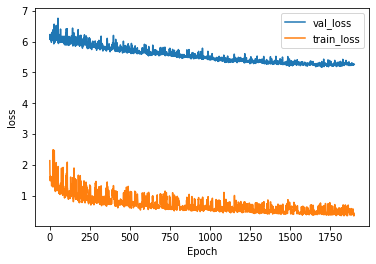

In [9]:
Y_pred_validate = model.predict(X_validate)

x = list(range(1899))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x, vy[100:-1], label='val_loss')
plt.plot( x, ty[100:-1], label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

# Testing

In [10]:
Y_pred = model.predict(X_test)

print("Explained variance: " + str(metrics.explained_variance_score(Y_test, Y_pred)))
print("Max Error: " + str(metrics.max_error(Y_test, Y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(Y_test, Y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(Y_test, Y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(Y_test, Y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(Y_test, Y_pred)))

Explained variance: 0.8358356556217632
Max Error: 25.98416519165039
Mean absolute error: 5.884295130675694
Mean squared error: 68.13384600056189
Root Mean squared error: 8.254322867477494
R2: 0.8358125860344181
